# Sales Analysis - DataCamp Data Analyst Certification


---------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
sns.set_style("darkgrid")

In [2]:
# Importing dataset
sales = pd.read_csv("product_sales.csv")
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

# Data Validation

- **There are missing values in the revenue section**
- **There are typos in the sales column**
- **There are forbidden values in the years_as_customer column**

Lets check integrity column by column

In [5]:
# Column 'week': should have only positive integer values

sales["week"].unique()

array([2, 6, 5, 4, 3, 1])

In [6]:
# So far, so good. Apparently, there are no missing values:
sales['week'].count() == sales.shape[0]

True

In [7]:
# Column 'sales_method': should be a categorical column, with values 'Email', 'Email + Call', 'Call'

sales["sales_method"].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [8]:
# There are some typos, lets correct them:
sales["sales_method"] = sales["sales_method"].str.title()
sales["sales_method"] = sales["sales_method"].str.replace('Em + Call', 'Email + Call', regex=False)

sales["sales_method"].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [9]:
# Lets check for missing values, there should be none:
sales["sales_method"].count() == sales.shape[0]

True

In [10]:
# Lets define categories. Since some methods takes more effort from the team than others, lets order them in ascending order, from less effort to maximum effort --> Call > Email + Call > Email

sales["sales_method"] = sales["sales_method"].astype("category")
sales["sales_method"] = sales["sales_method"].cat.set_categories(["Call", "Email + Call", "Email"], ordered = True)

sales["sales_method"].value_counts(dropna = False)
# Done!

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [11]:
# Column "customer_id": identifies who did the buy
len(sales["customer_id"].unique()) == sales.shape[0]

# There are unique values for each row, every customer bougth only once. Or at least is a unique ID for the sale.
# No correction needed

True

In [12]:
# Column "nb_sold": number of product sold to the customer. Should contain only positive integer values
np.sort(sales["nb_sold"].unique())

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [13]:
# Checking for missing values, apparently there are none
sales["nb_sold"].count() == sales.shape[0]

# No correction needed 

True

In [14]:
# Column "revenue": revenue of the corresponding sale. Should contain only positive float values
np.sort(sales["revenue"].unique())

array([ 32.54,  32.59,  32.62, ..., 238.23, 238.32,    nan])

In [15]:
# Y can see there are missing values. But lets guarantee that the remaining values are all positive
(sales["revenue"].dropna() >= 0).all()

True

Great, but we have to deal with the missing values. I'll do that later

In [16]:
# Column "years_as_customer": only positive integer values, ranging from 0 to 41
sales["years_as_customer"].unique()

array([ 0,  1,  6,  3, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36, 15, 14, 19,
       13, 12, 11, 30, 24, 22, 18, 26, 23, 32, 16, 39, 25, 33, 21, 31, 27,
       34, 28, 29, 35, 38, 37, 63, 47])

In [17]:
# There are no missing values, but our company was founded in 1984! There can't be users with more than 41 years as customers

condition_years = sales["years_as_customer"] <=41

sales[~condition_years]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


**There are values greater than 41 in the `years_as_customer` column**. I will remove those entries

In [18]:
# Getting indexes of registers to drop
index_years = sales[~condition_years].index

# Dropping registers
sales = sales.drop(index_years)

# Done!
np.sort(sales["years_as_customer"].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [19]:
# Column "nb_site_visits": positive integer values only
np.sort(sales["nb_site_visits"].unique())

# No correction needed.

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 41])

In [20]:
# Column "state": location of the customer who did the buy

len(sales["state"].value_counts(dropna = False))

# Seems like there are no missing values nor typos.
# No correction needed

50

In [21]:
np.sort(sales["state"].unique())

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [22]:
# We can check that "revenue" is the only column with missing values:
sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

## **Missing revenue values**

In [23]:
# Setting threshold: if missing values represent less than 3% of the data, I can drop them
sales["revenue"].isna().mean()

0.0716095479397253

In [24]:
# There are about 7% of missing data.

# Distribution by sales_method
sales[sales["revenue"].isna()].value_counts("sales_method")

sales_method
Email           544
Email + Call    349
Call            181
Name: count, dtype: int64

In [25]:
# I want to see how significant they are compared to the rest of the data, for each sales method
revenue_per_method = sales[["sales_method", "revenue"]]

revenue_per_method["is_null"] = revenue_per_method["revenue"].isna()

df = revenue_per_method.groupby("sales_method")["is_null"].value_counts(normalize=True)

print(df)

sales_method  is_null
Call          False      0.963515
              True       0.036485
Email + Call  False      0.864308
              True       0.135692
Email         False      0.927127
              True       0.072873
Name: proportion, dtype: float64


/tmp/ipykernel_4645/4226487292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_per_method["is_null"] = revenue_per_method["revenue"].isna()
/tmp/ipykernel_4645/4226487292.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = revenue_per_method.groupby("sales_method")["is_null"].value_counts(normalize=True)


We have 7% of data that's missing from the revenue column. **That is above the 3% standard threshold.**
Moreover, we have that for "Email+Call" category missing values represent more than 13% of data. To adress this issue:
- Explore revenue distribution per sales method
- Explore how revenue varies with sales method
- If there are less than 3% missing values: drop them
- Otherwise, replace them with mean or median value

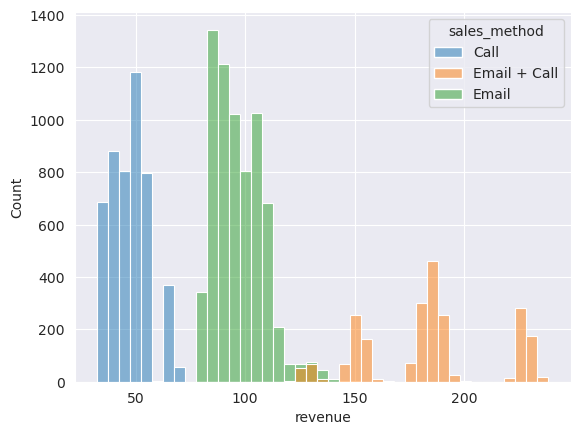

In [26]:
sns.histplot(data=revenue_per_method,
             x="revenue",
            hue="sales_method",
            binwidth=5)
plt.show()

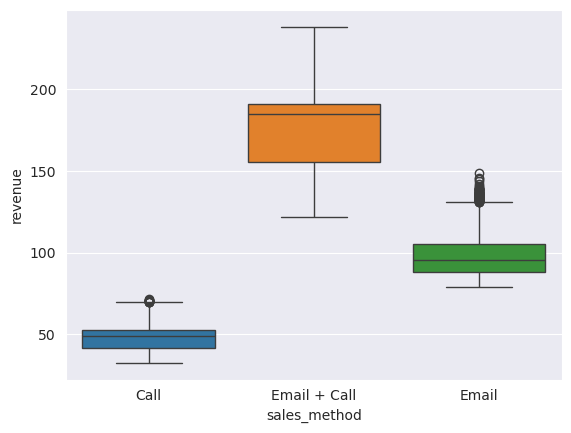

In [27]:
sns.boxplot(data=revenue_per_method,
            x="sales_method",
            y="revenue",
            hue="sales_method")
plt.show()

Since revenue varies with sales method, we have to consider a category-based imputation.

### **Adressing missing values: Call method**

For the Call method, missing values represent slightly more than 3%. When analizing revenue distribution, it presents a right-skewed distribution:

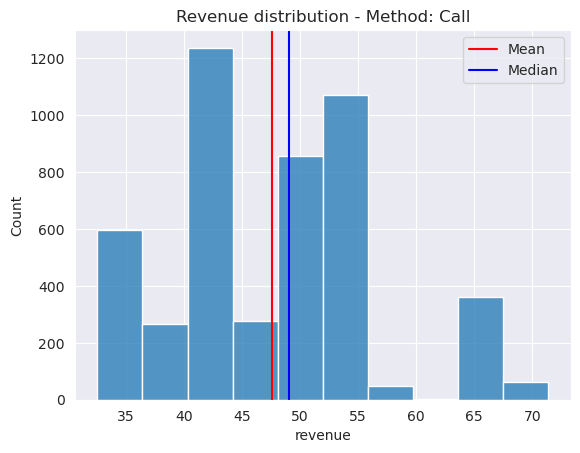

In [28]:
sns.histplot(data=sales[sales["sales_method"]=="Call"],
             x="revenue",
             binwidth=4)
plt.title("Revenue distribution - Method: Call")
plt.axvline(x=sales[sales["sales_method"]=="Call"]["revenue"].mean(), 
            color = "r",
            label = "Mean")
plt.axvline(x=sales[sales["sales_method"]=="Call"]["revenue"].median(), 
            color = "b",
            label = "Median")
plt.legend()
plt.show()

I will use median imputation to assess missing values for the Call method:

In [29]:
# Calculating median revenue: Call method
median_rev_call = sales[sales["sales_method"]=="Call"]["revenue"].median()

# Finding missing revenue values for Call method
call_nulls = sales[sales["sales_method"] == "Call"]["revenue"].isna()
# Getting index values of those rows
call_nulls_index = sales[sales["sales_method"] == "Call"][call_nulls].index

# Replacing missing values with median revenue
sales.loc[call_nulls_index, "revenue"] = median_rev_call


<Axes: xlabel='revenue', ylabel='Count'>

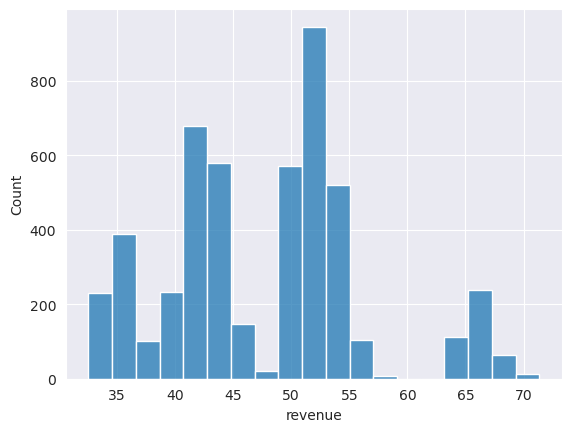

In [30]:
sns.histplot(data=sales[sales["sales_method"]=="Call"],
             x="revenue",
             binwidth=2)

In [31]:
sales[sales["revenue"].isna()].value_counts("sales_method")

sales_method
Email           544
Email + Call    349
Call              0
Name: count, dtype: int64

### **Adressing missing values: Email method**

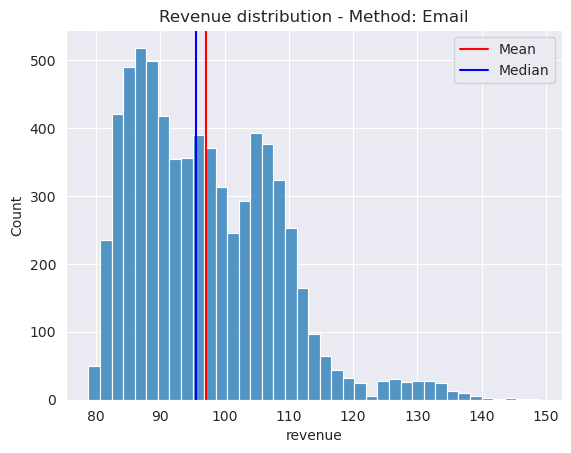

In [32]:
sns.histplot(data = sales[sales["sales_method"]=="Email"],
             x="revenue")
plt.title("Revenue distribution - Method: Email")
plt.axvline(x=sales[sales["sales_method"]=="Email"]["revenue"].mean(), 
            color = "r",
            label = "Mean")
plt.axvline(x=sales[sales["sales_method"]=="Email"]["revenue"].median(), 
            color = "b",
            label = "Median")
plt.legend()
plt.show()

The distribution doesn't seem normal, and it is right-skewed. It do has to pikes, at about \$ 85 and \$ 105: **there could be two different subgroups within the Email method group of customers**. Mean and mode doesn't seem representative of this dataset.

In [33]:
sales_email = sales[sales["sales_method"]=="Email"]
sales_email.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma


In [34]:
# Splitting into two groups to search for patterns: revenues above and below 100
above_100 = sales_email[sales_email["revenue"] > 100]
below_100 = sales_email[sales_email["revenue"] <= 100]

In [35]:
above_100.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,3.847851,10.909795,109.104096,4.595045,26.068138
std,1.293074,0.855561,7.770046,4.729656,3.138675
min,1.000000,10.000000,100.010000,0.000000,15.000000
25%,2.000000,10.000000,104.190000,1.000000,24.000000
50%,4.000000,11.000000,107.100000,3.000000,26.000000
75%,5.000000,11.000000,111.035000,6.000000,28.000000
max,6.000000,15.000000,148.970000,39.000000,36.000000


In [36]:
below_100.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,1.635546,9.016367,89.996480,5.224988,23.939834
std,0.829033,0.668442,5.321423,5.202392,3.091536
min,1.000000,8.000000,78.830000,0.000000,13.000000
25%,1.000000,9.000000,85.580000,2.000000,22.000000
50%,1.000000,9.000000,89.455000,4.000000,24.000000
75%,2.000000,9.000000,94.597500,7.000000,26.000000
max,3.000000,10.000000,100.000000,39.000000,35.000000


I can see a relationship between *week* and *revenue*: for revenues above \$100, the average weeks since launching is 3.84, while for revenues below \$100, it is 1.63 weeks. Seems like, on average, **higher revenues are achieved for a larger number of weeks, while products sold after a shorter period result in lesser revenues**.

I will create two different groups based on *weeks*, splitting by the total average number of weeks

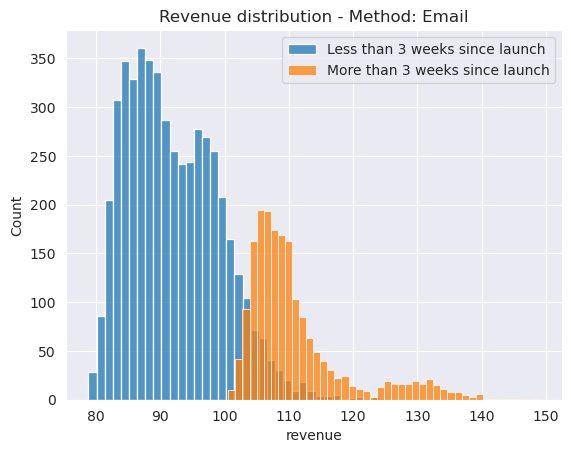

In [37]:
mean_weeks = sales["week"].mean()

group_1 = sales_email[sales_email["week"] <= mean_weeks]
group_2 = sales_email[sales_email["week"] > mean_weeks]

sns.histplot(data=group_1, x= "revenue", label="Less than 3 weeks since launch")
sns.histplot(data=group_2, x= "revenue", label="More than 3 weeks since launch")
plt.title("Revenue distribution - Method: Email")
plt.legend()
plt.show()

I will use this 2 groups to perform missing data imputation: since both distributions are right-skewed, **I will replace missing values with the median in each case**.

In [38]:
# Missing data imputation: a function that returns an Index array of row indexes where missing data is located, for a given column

def missing_indexes(df, col):
    nulls = df[col].isna()
    return df[nulls].index

# Searching missing data in sales_email:
email_null_1 = missing_indexes(group_1, "revenue")
email_null_2 = missing_indexes(group_2, "revenue")

# Replacing with median values:
sales.loc[email_null_1, "revenue"] = group_1["revenue"].median()
sales.loc[email_null_2, "revenue"] = group_2["revenue"].median()

sales[sales["revenue"].isna()].value_counts("sales_method")
# Done!

sales_method
Email + Call    349
Call              0
Email             0
Name: count, dtype: int64

### **Adressing missing values: Email + Call method**

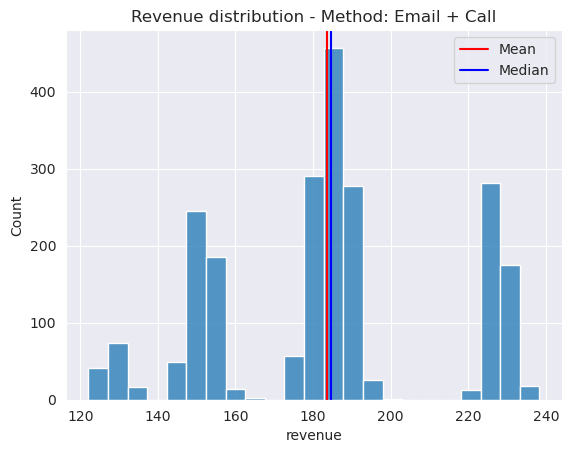

In [39]:
sns.histplot(data = sales[sales["sales_method"]=="Email + Call"],
             x="revenue",
             binwidth = 5)
plt.title("Revenue distribution - Method: Email + Call")
plt.axvline(x=sales[sales["sales_method"]=="Email + Call"]["revenue"].mean(), 
            color = "r",
            label = "Mean")
plt.axvline(x=sales[sales["sales_method"]=="Email + Call"]["revenue"].median(), 
            color = "b",
            label = "Median")
plt.legend()
plt.show()

It is evident that there are 4 different subgroups in revenue when implementing the *Email + Call* method,  modulated by an overall normal-like behaviour: **the central peak is more significant than the others**. 

I will segment data into 4 subgroups by their revenue values.

In [40]:
# Clustering data
sales_email_call = sales[sales["sales_method"]=="Email + Call"]

# Creating 4 intervals and labeling rows:
min_revenue = sales_email_call["revenue"].min()
max_revenue = sales_email_call["revenue"].max()
n = 1
for i, j in zip([min_revenue, 140, 170, 205], [140, 170, 205, max_revenue]):
    interval = (sales_email_call["revenue"] >= i) & (sales_email_call["revenue"] <= j)
    indexes = sales_email_call[interval].index
    sales_email_call.loc[ indexes,"group"] = n
    n += 1

sales_email_call.head()

/tmp/ipykernel_4645/2913555945.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_email_call.loc[ indexes,"group"] = n


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,group
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,4.0
17,6,Email + Call,d10690f0-6f63-409f-a1da-8ab0e5388390,15,NaN,0,24,Wisconsin,NaN
21,1,Email + Call,544cf718-2b90-4e9f-ac4a-40ba0e7f2c88,9,128.87,6,24,Michigan,1.0
22,3,Email + Call,d72de17a-0d71-401b-b64a-dc4492b2b1ed,10,150.47,20,21,North Carolina,2.0
27,3,Email + Call,2c211b5b-7e1b-4b19-949e-a35f67e9fe25,10,153.07,8,24,Michigan,2.0


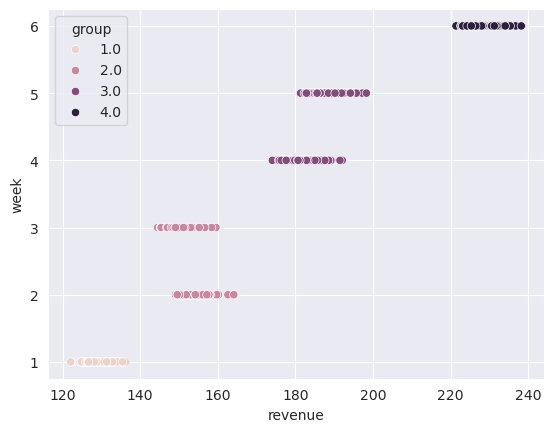

In [41]:
sns.scatterplot(data=sales_email_call,
                x="revenue",
                y="week",
                hue="group")
plt.show()

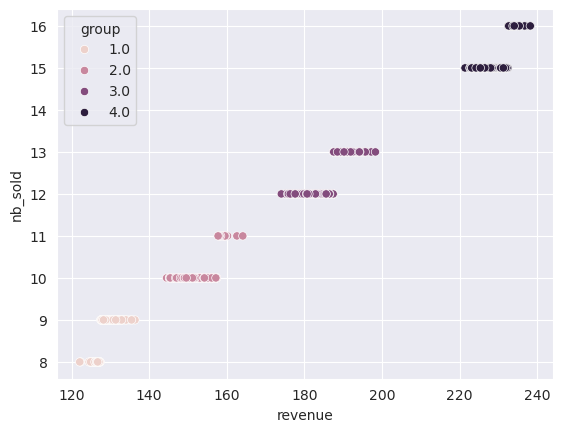

In [42]:
sns.scatterplot(data=sales_email_call,
                x="revenue",
                y="nb_sold",
                hue="group")
plt.show()

We found that the columns *week* and *nb_sold* vary for each group, while the other variables do not. **I will use *nb_sold* to characterize each group**.

Recall that every group has a normal distribution of revenue values (multimodal dist.): I will use mean imputation for missing data on each group.

In [43]:
# Caclulating nb_sold limits per group
sales_email_call.groupby("group").agg({"nb_sold": ["min","max"]})

nb_sold    
          min max
group            
1.0         8   9
2.0        10  11
3.0        12  13
4.0        15  16

In [44]:
for i, j in zip([8,10,12,15], [9,11,13,16]):
    
    # Filtering original sales and email_call by nb_sold
    condition = (sales["nb_sold"] >= i) & (sales["nb_sold"] <= j)
    sales_filtered = sales[condition]
    email_call_filtered = sales_email_call[condition]
    
    # Getting indexes of rows with missing values
    nulls = missing_indexes(sales_filtered, "revenue")
    
    # Replacing with mean values from email_call:
    sales.loc[nulls, "revenue"] = email_call_filtered["revenue"].mean().round(2)
    
sales[sales["revenue"].isna()].value_counts("sales_method")
# Done!

/tmp/ipykernel_4645/3508690473.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  email_call_filtered = sales_email_call[condition]
/tmp/ipykernel_4645/3508690473.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  email_call_filtered = sales_email_call[condition]
/tmp/ipykernel_4645/3508690473.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  email_call_filtered = sales_email_call[condition]
/tmp/ipykernel_4645/3508690473.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  email_call_filtered = sales_email_call[condition]


sales_method
Call            0
Email + Call    0
Email           0
Name: count, dtype: int64

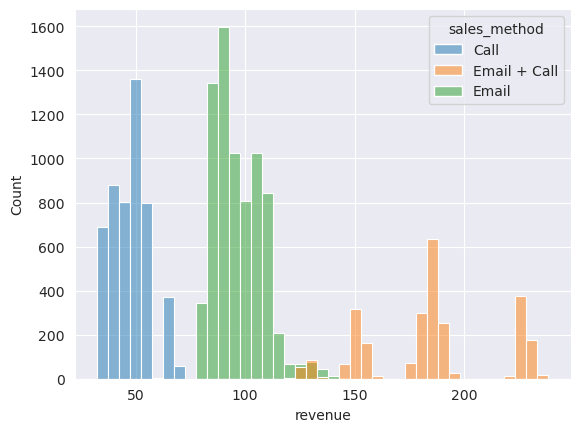

In [45]:
# Lets review revenue distribution
sns.histplot(data=sales,
             x="revenue",
             hue="sales_method",
             binwidth=5)
plt.show()

After data cleaning and missing data imputation, we get the same revenue distribution.

In [46]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               14998 non-null  int64   
 1   sales_method       14998 non-null  category
 2   customer_id        14998 non-null  object  
 3   nb_sold            14998 non-null  int64   
 4   revenue            14998 non-null  float64 
 5   years_as_customer  14998 non-null  int64   
 6   nb_site_visits     14998 non-null  int64   
 7   state              14998 non-null  object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 1.4+ MB


In [47]:
sales.shape

(14998, 8)

After the data validation, **the dataset contains 14998 rows and 8 columns without missing values**

# Exploratory Analysis

## 1 - Number of customers for each approach

Having check that every row correspond to a single customer, we have to count number of rows per sales method:

In [48]:
len(sales["customer_id"].unique())

14998

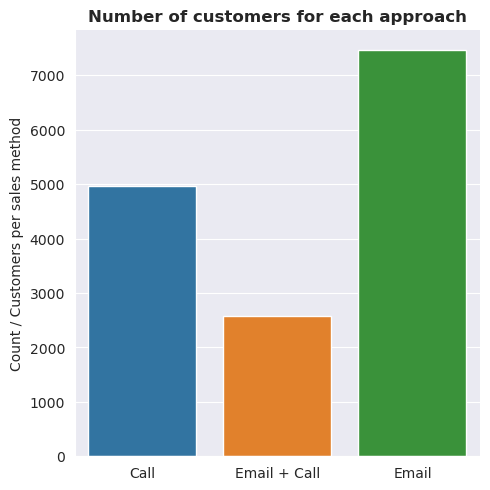

In [50]:
ax = sns.catplot(data=sales,
            kind="count",
            x="sales_method",
            hue="sales_method")
plt.ylabel("Count / Customers per sales method")
#ax.legend.set_title("")
plt.xlabel("")
plt.title("Number of customers for each approach", fontdict={"weight":"bold"})
plt.show()

In [51]:
print("Number of customers for each approach:")
for method in ["Call", "Email + Call", "Email"]:
    n = sales[sales["sales_method"]==method]["sales_method"].count()
    print(f"{method}: {n} sales")

Number of customers for each approach:
Call: 4961 sales
Email + Call: 2572 sales
Email: 7465 sales


There were **7465 customers for the Email approach, 4961 for the Call approach and 2572 for the Email and Call approach**. 

As can be seen, the number of customers for the *Email* approach almost equals the sum of the other two methods, which is reasonable since it is the one that requires the least effort from the sales team. It is worth noting that the second method (ranked from easiest to hardest), which is *Email and Call*, presents almost half the sales of the *Call* method. Since our dataset only tracks customers who made a purchase and not the total number of addressed customers, we cannot draw further conclusions regarding the effectiveness of each approach. 

## 2 - Spread of the revenue

Lets explore the total revenue distribution:

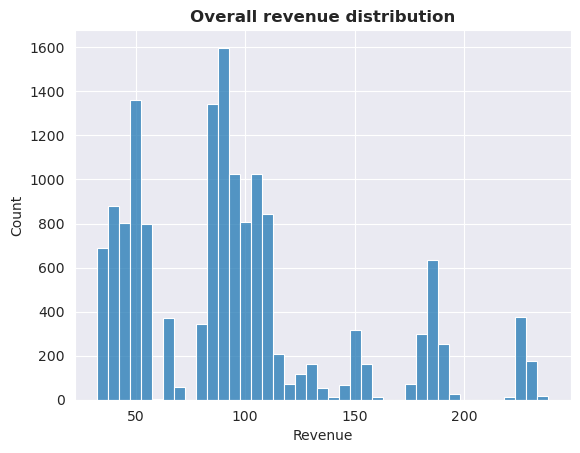

In [52]:
sns.histplot(data=sales,
             x="revenue",
             binwidth=5)
plt.title("Overall revenue distribution", fontdict={"weight":"bold"})
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

Total revenue shows a multimodal distribution, with the majority of revenues lying below 150, but with 3 distinct peaks occuring around 50, 90 and 180. We can see that this multimodal behaviour responds to distinct sales method:

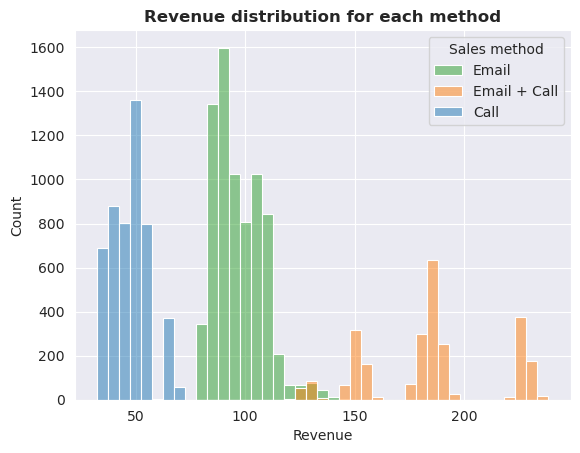

In [53]:
ax = sns.histplot(data=sales,
                  x="revenue",
                  hue="sales_method",
                  binwidth = 5)

plt.legend(title="Sales method", labels=["Email", "Email + Call", "Call"])
plt.title("Revenue distribution for each method", fontdict={"weight":"bold"})
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

In [54]:
n1 = sales["revenue"].min()
n2 = sales["revenue"].max()
print("Revenue range")
print(f"Min. revenue: {n1}")
print(f"Min. revenue: {n2}")

Revenue range
Min. revenue: 32.54
Min. revenue: 238.32


Total revenue presents a significant spread, **ranging from 32.54 to 238.32**.

The revenue distribution is right-skewed and mostly concentrated below 150, but there are other significant peaks above this value, so these data points cannot be classified as outliers. Moreover, values above 150 are representative of the *Email + Call* method.

To compare revenue per sales method, it is useful to display a box plot:

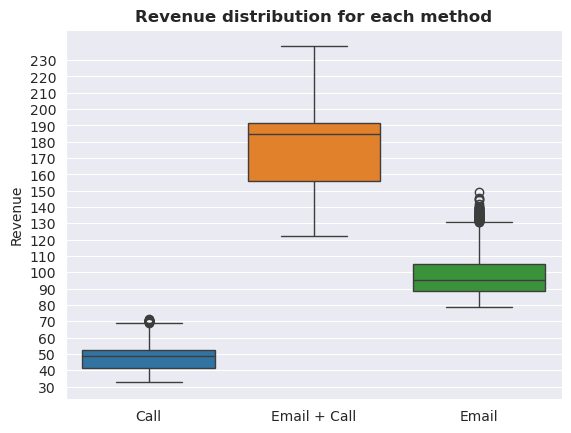

In [55]:
ax = sns.boxplot(data=sales,
                  x="sales_method",
                  hue="sales_method",
                  y="revenue")

plt.title("Revenue distribution for each method", fontdict={"weight":"bold"})
plt.xlabel("")
plt.ylabel("Revenue")
plt.yticks(range(30,240,10))
plt.show()

Taking the IQR as the most significant measure in this case, we see that **the *Email + Call* method performed the best**, achieving revenues from 155 to 190, **the *Email* method ranked second**, with revenues ranging from 85 to 105, while **the *Call* method performed the worst**, with revenues between 40 and 55.

In [56]:
# Mean revenue and standard deviation per sales method
sales.groupby("sales_method")["revenue"].agg(["mean", "std"])

/tmp/ipykernel_4645/3026194648.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby("sales_method")["revenue"].agg(["mean", "std"])


,mean,std
sales_method,,
Call,47.649883,8.456520
Email + Call,184.212228,29.119477
Email,97.058414,11.016660


## 3 - Revenue evolution over time

The dataset tracks sales after the launch of a new line of office stationery. The column *week* records the number of weeks since launching, ranging from 1 to 6, which is the present time. I will use this variable to assess revenue evolution over time.

/home/juanjo/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


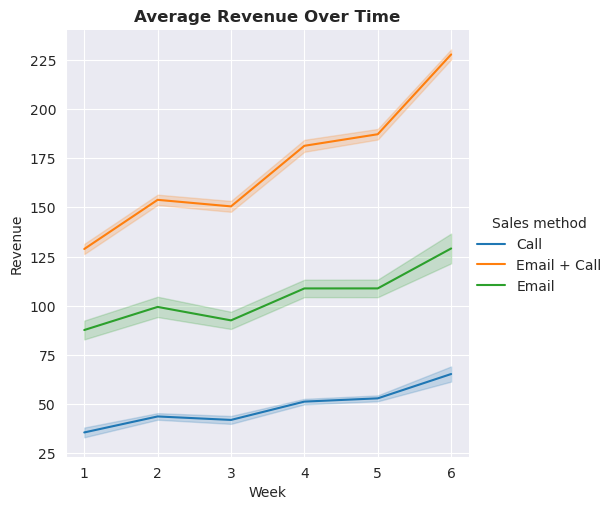

In [57]:
ax = sns.relplot(data=sales,
                 x="week",
                 y="revenue",
                 kind="line",
                 hue="sales_method",
                 ci="sd"
                 )

ax.legend.set_title("Sales method")
plt.title("Average Revenue Over Time", fontdict={"weight":"bold"})
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.show()


In [58]:
revenue_avg = pd.pivot_table(data=sales, index="week", columns="sales_method", values="revenue", aggfunc="mean")

revenue_avg["Diff_Call_EmC"] = abs(revenue_avg["Call"] - revenue_avg["Email + Call"])
revenue_avg["Diff_Call_Email"] = abs(revenue_avg["Call"] - revenue_avg["Email"])
revenue_avg["Diff_Email_EmC"] = abs(revenue_avg["Email"] - revenue_avg["Email + Call"])

revenue_avg

/tmp/ipykernel_4645/3957433866.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  revenue_avg = pd.pivot_table(data=sales, index="week", columns="sales_method", values="revenue", aggfunc="mean")


sales_method,Call,Email + Call,Email,Diff_Call_EmC,Diff_Call_Email,Diff_Email_EmC
week,,,,,,
1,35.675567,128.896149,87.726934,93.220581,52.051367,41.169214
2,43.805615,153.883450,99.465131,110.077835,55.659516,54.418319
3,42.034335,150.551643,92.627122,108.517309,50.592787,57.924522
4,51.349173,181.339596,108.859972,129.990423,57.510799,72.479624
5,53.000920,187.216226,108.873553,134.215307,55.872634,78.342673
6,65.363772,227.770532,129.164010,162.406759,63.800238,98.606522


/tmp/ipykernel_4645/971632961.py:1: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.relplot(data=sales,
/home/juanjo/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


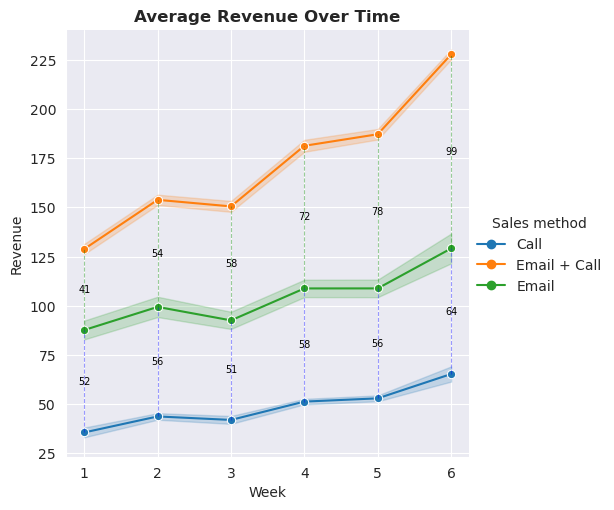

In [59]:
ax = sns.relplot(data=sales,
                 x="week",
                 y="revenue",
                 kind="line",
                 hue="sales_method",
                 ci="sd",
                 markers=["o"],
                 style="sales_method",
                 dashes=False
                 )

for week in revenue_avg.index:
    plt.plot([week,week],
             [revenue_avg.loc[week, "Call"], revenue_avg.loc[week, "Email"]],
             "b--",
             alpha = 0.4,
             linewidth = 0.8
             )
    diff_1 = revenue_avg.loc[week, "Diff_Call_Email"]
    plt.text(week, (revenue_avg.loc[week, "Call"] + revenue_avg.loc[week, "Email"])/2,
             f"{diff_1:0.0f}", 
             ha='center', va='center', fontsize=7, color='black')
    
    plt.plot([week,week],
             [revenue_avg.loc[week, "Email"], revenue_avg.loc[week, "Email + Call"]],
             "g--",
             alpha = 0.4,
             linewidth = 0.8
             )
    
    diff_2 = revenue_avg.loc[week, "Diff_Email_EmC"]
    plt.text(week, (revenue_avg.loc[week, "Email"] + revenue_avg.loc[week, "Email + Call"])/2,
             f"{diff_2:0.0f}", 
             ha='center', va='center', fontsize=7, color='black')
    
    
ax.legend.set_title("Sales method")
plt.title("Average Revenue Over Time", fontdict={"weight":"bold"})
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.show()

Some conclusions:
- The Call method performed the worst, while being also the most effort-demanding for the workers.
- The difference between Email and Call remained almost constant, with a slightly growing tendency.
- The Email + Call method performed the best by far, with difference in revenue against other methods growing over time.

## 4 - More tests

### Total revenue evolution over time

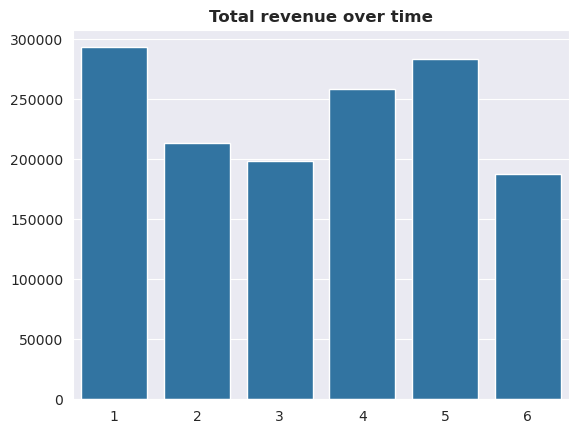

In [60]:
# Total revenue per sales method

sns.barplot(data=sales,
            x = "week",
            y = "revenue",
            estimator = "sum",
            errorbar = None)

plt.title("Total revenue over time", fontdict={"weight":"bold"})
plt.xlabel("")
plt.ylabel("")
plt.show()

In [61]:
# Total revenue:
total = sales["revenue"].sum()
print(f"Total revenue = {total:.2f}")

Total revenue = 1434725.98


### Total revenue per sales method

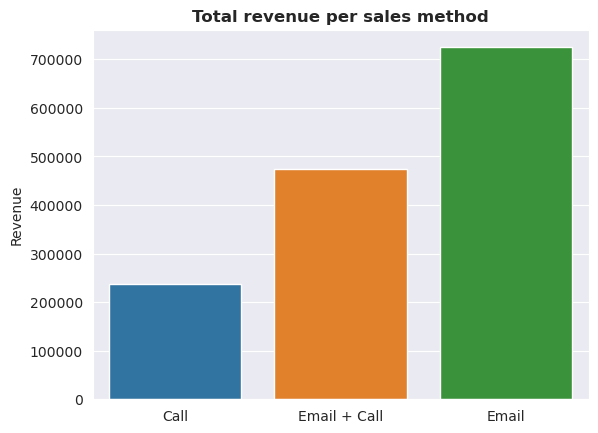

'\nsales.groupby("sales_method")["revenue"].sum().plot(kind="bar")\nplt.title("Total revenue per sales method")\nplt.show()\n'

In [62]:
# Total revenue per sales method

sns.barplot(data=sales,
            x = "sales_method",
            y = "revenue",
            hue = "sales_method",
            estimator = "sum",
            errorbar = None)

plt.title("Total revenue per sales method", fontdict={"weight":"bold"})
plt.xlabel("")
plt.ylabel("Revenue")
plt.show()


"""
sales.groupby("sales_method")["revenue"].sum().plot(kind="bar")
plt.title("Total revenue per sales method")
plt.show()
"""

In [63]:
sales.groupby("sales_method")["revenue"].sum()

/tmp/ipykernel_4645/3132546130.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby("sales_method")["revenue"].sum()


sales_method
Call            236391.07
Email + Call    473793.85
Email           724541.06
Name: revenue, dtype: float64

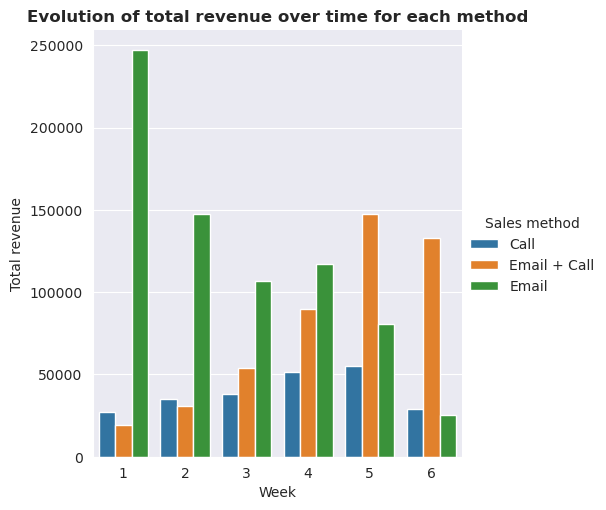

In [64]:
# Evolution of total revenue over time for each method
ax = sns.catplot(data=sales,
                 x="week",
                 y="revenue",
                 kind="bar",
                 estimator="sum",
                 hue="sales_method",
                 errorbar=None)
ax.legend.set_title("Sales method")
plt.title("Evolution of total revenue over time for each method",
          fontdict={"weight":"bold"})
plt.ylabel("Total revenue")
plt.xlabel("Week")
plt.show()

In [65]:
# Cummulative revenue over time for each method
rev_per_week = pd.pivot_table(data=sales, 
                             index="week", 
                             columns="sales_method", 
                             values="revenue", 
                             aggfunc="sum")

for method in ["Call", "Email + Call", "Email"]:
    rev_per_week[method] = rev_per_week[method].cumsum()
    
rev_per_week

/tmp/ipykernel_4645/3260848392.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rev_per_week = pd.pivot_table(data=sales,


sales_method,Call,Email + Call,Email
week,,,
1,27042.08,19076.63,246951.32
2,62305.60,49853.32,394657.04
3,100220.57,103901.36,501178.23
4,151775.14,193664.46,618202.70
5,207108.10,341003.63,699095.75
6,236391.07,473793.85,724541.06


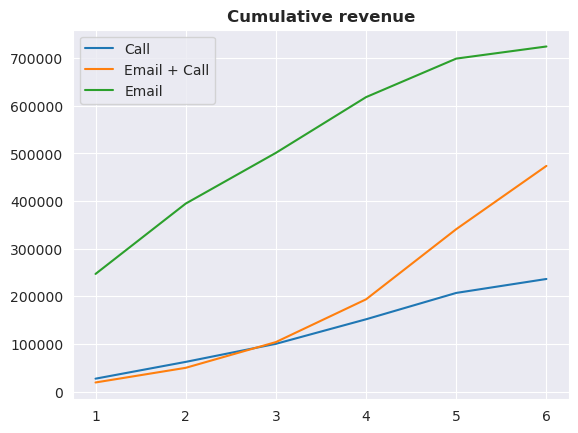

In [79]:
for method in ["Call", "Email + Call", "Email"]:
    plt.plot(rev_per_week.index, rev_per_week[method], label=method)

plt.title("Cumulative revenue", fontdict={"weight":"bold"})
plt.legend()
plt.show()

### Customers evolution over time

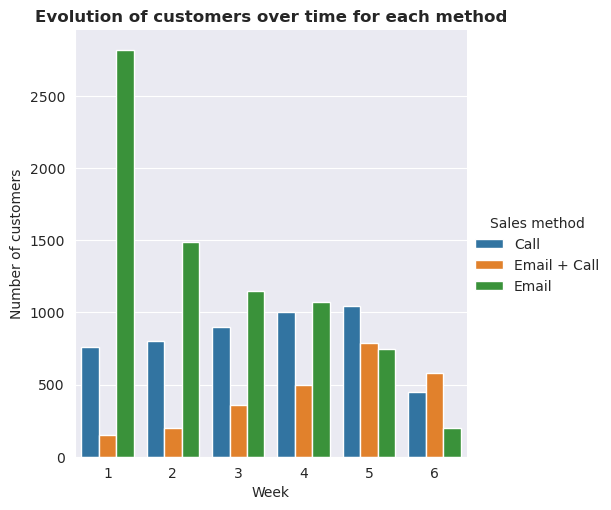

In [67]:
# Evolution of customers over time for each method
ax = sns.catplot(data=sales,
                 x="week",
                 kind="count",
                 hue="sales_method")
ax.legend.set_title("Sales method")
plt.title("Evolution of customers over time for each method",
          fontdict={"weight":"bold"})
plt.ylabel("Number of customers")
plt.xlabel("Week")
plt.show()

### Years as customer per sales method

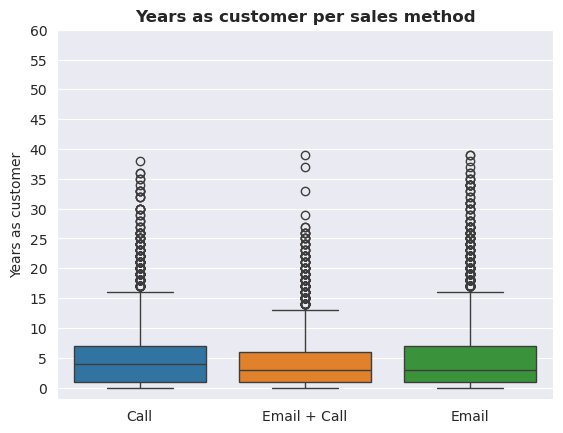

In [68]:
# Average years as customer per sales method:
sns.boxplot(data=sales,
               x="sales_method",
               y="years_as_customer",
               hue="sales_method")
plt.title("Years as customer per sales method", fontdict={"weight":"bold"})
plt.yticks(range(0,65,5))
plt.ylabel("Years as customer")
plt.xlabel("")
plt.show()

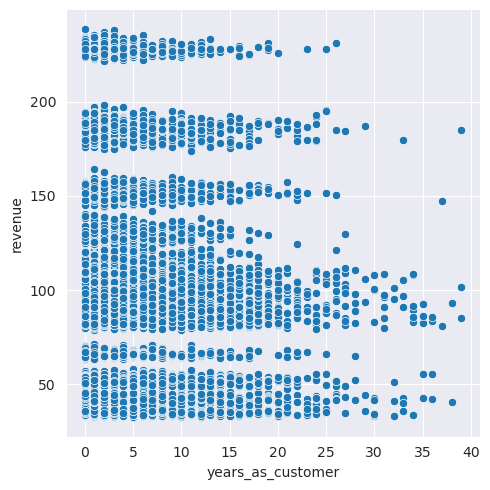

In [69]:
# Revenue per years_as_customer

sns.relplot(data=sales,
            x="years_as_customer",
            y="revenue",
            )

In [70]:
min_year = sales["years_as_customer"].min()
max_year = sales["years_as_customer"].max()

print(f"Years as customer: from {min_year} to {max_year}")

Years as customer: from 0 to 39


In [71]:
sales.groupby("sales_method")["years_as_customer"].agg(["mean", "std", "median"])

/tmp/ipykernel_4645/4260690337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby("sales_method")["years_as_customer"].agg(["mean", "std", "median"])


,mean,std,median
sales_method,,,
Call,5.168313,5.089530,4.0
Email + Call,4.507387,4.760987,3.0
Email,4.976021,5.033525,3.0


### Website visits per sales method

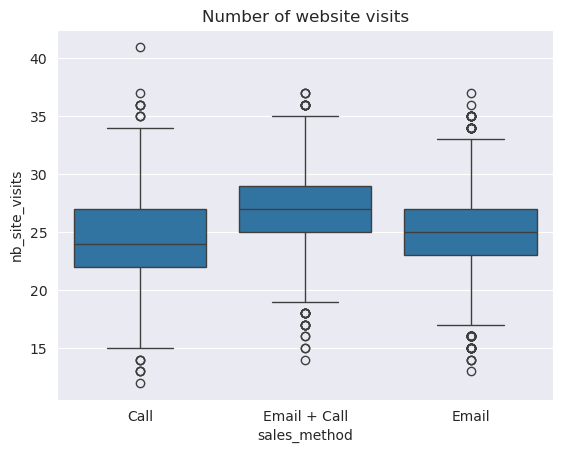

In [72]:
# Number of website visits per sales method
sns.boxplot(data=sales,
            x="sales_method",
            y="nb_site_visits")
plt.title("Number of website visits")
plt.show()

### Number of products sold per sales method

It can be interpreted from the plot that for the Email + Call method we achieve more products sold than with the other methods.

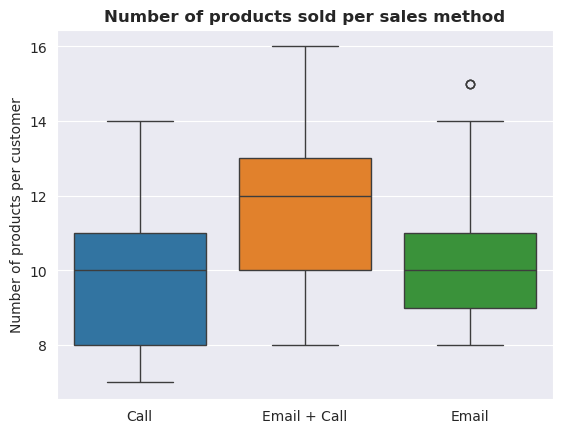

In [80]:
# Number of products sold per sales method
sns.boxplot(data=sales,
               x="sales_method",
               y="nb_sold",
               hue="sales_method")
plt.title("Number of products sold per sales method", fontdict={"weight":"bold"})
plt.ylabel("Number of products per customer")
plt.xlabel("")
plt.show()